# Comparing pass managers
This notebook display graphs comparing
- Depth
- Depth ratio
- Time
- Cx gate count
- Total gate count
of all of the pass managers. 

It will also display a table summarizing the results and shows the percent different compared to sabre_v020 routing pass.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import os

In [2]:
# Variables to change
qc_name = "size25_depth_10"
excluded_datasets = []

In [3]:
directory_path = f'data/{qc_name}'
files = [f for f in os.listdir(directory_path) if f.endswith('.csv') and f.replace('.csv', '') not in excluded_datasets]

datasets = {}
for file in files:
    dataset_path = os.path.join(directory_path, file)
    dataset_name = file.replace('.csv', '')
    datasets[dataset_name] = pd.read_csv(dataset_path)

# Sorting dataset names (excluding the reference dataset)
ref_dataset_name = 'sabre_v020'  # Change as needed
sorted_dataset_names = sorted([name for name in datasets.keys() if name != ref_dataset_name])

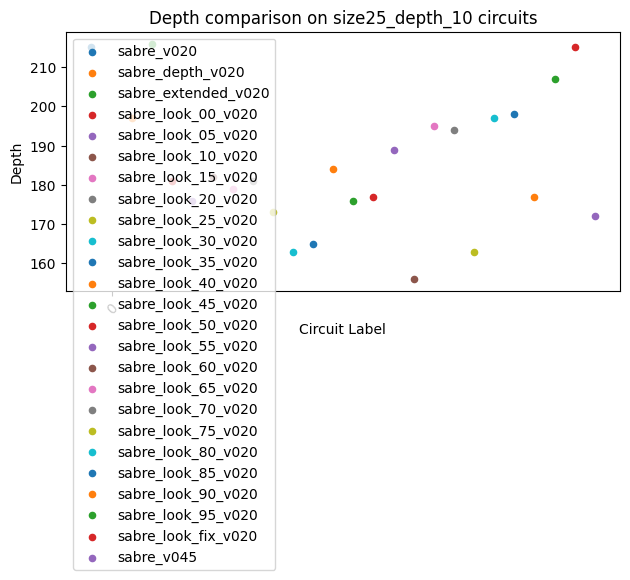

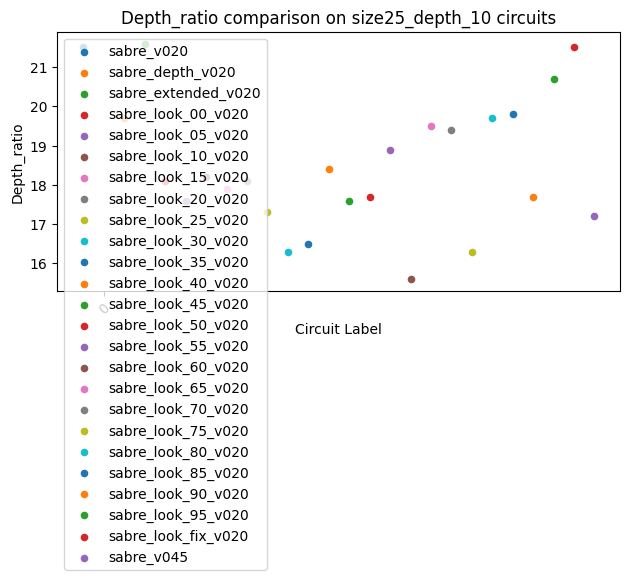

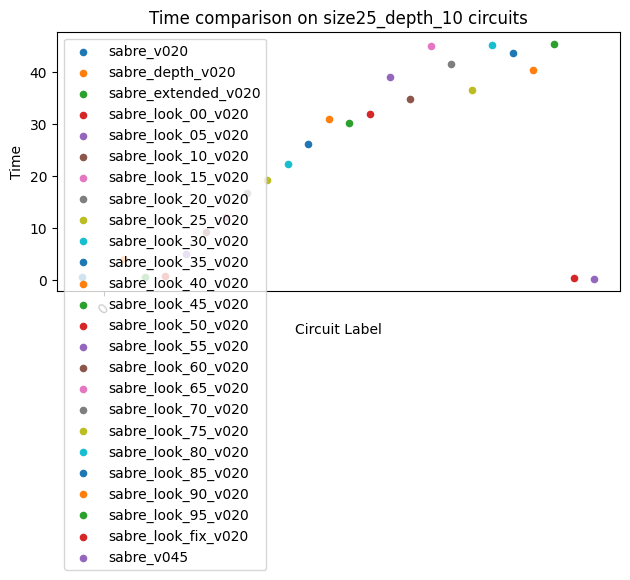

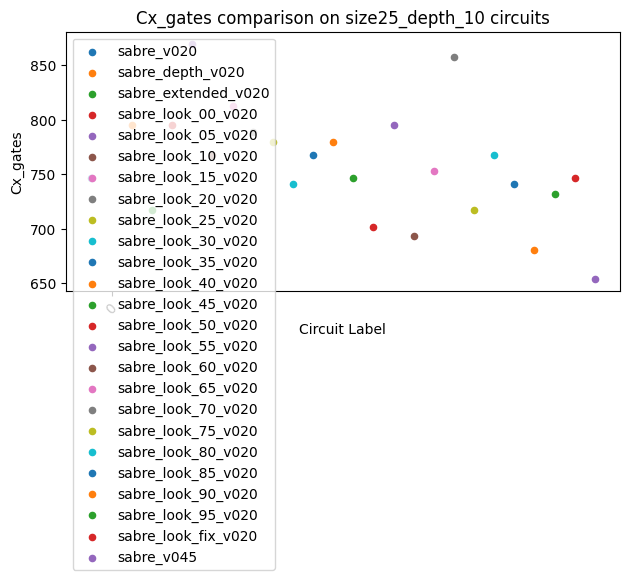

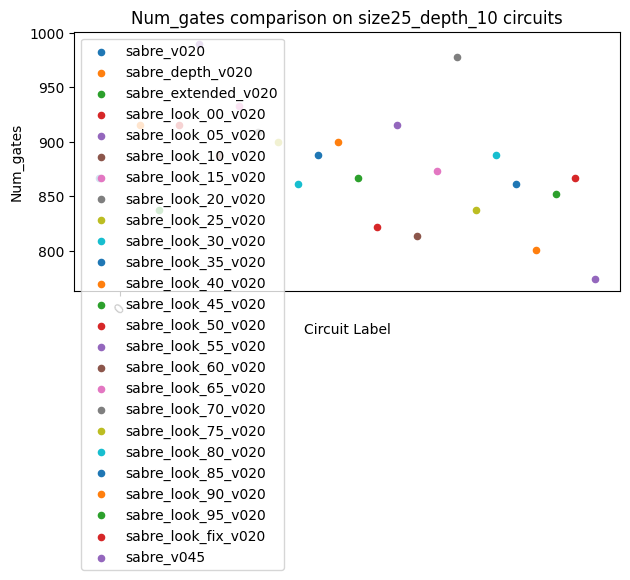

In [4]:


labels = list(set(sum([df['circuit label'].tolist() for df in datasets.values()], [])))
labels.sort()

x = np.arange(len(labels))
num_datasets = len(datasets) - 1  # excluding the reference dataset
shift = 0.15
shift_increment = (num_datasets * shift) / (num_datasets + 1)

# Plotting each attribute
attributes = ['depth', 'depth_ratio', 'time', 'cx_gates', 'num_gates']
for attribute in attributes:
    fig, ax = plt.subplots()

    # Plotting reference dataset separately
    ref_values = [ast.literal_eval(item)[attribute] for item in datasets[ref_dataset_name]['best_data']]
    ref_vals = [ref_values[datasets[ref_dataset_name]['circuit label'].tolist().index(label)] if label in datasets[ref_dataset_name]['circuit label'].tolist() else 0 for label in labels]
    ax.scatter(x - shift, ref_vals, label=ref_dataset_name, s=20)

    # Plotting other datasets
    for i, dataset_name in enumerate(sorted_dataset_names):
        df = datasets[dataset_name]
        values = [ast.literal_eval(item)[attribute] for item in df['best_data']]
        vals = [values[df['circuit label'].tolist().index(label)] if label in df['circuit label'].tolist() else 0 for label in labels]
        
        ax.scatter(x + (i + 1) * shift_increment, vals, label=dataset_name, s=20)

    # Setting labels and title
    ax.set_xlabel('Circuit Label')
    ax.set_ylabel(attribute.capitalize())
    ax.set_title(f'{attribute.capitalize()} comparison on {qc_name} circuits')

    # Setting ticks
    n = 10
    ax.set_xticks(x[::n])
    ax.set_xticklabels(labels[::n], rotation=45)

    ax.legend()
    fig.tight_layout()
    plt.show()



In [5]:
if ref_dataset_name not in datasets:
    raise ValueError(f"Reference dataset '{ref_dataset_name}' not found in the provided directory.")

attributes = ['depth', 'depth_ratio', 'time', 'cx_gates', 'num_gates']
avg_results = {attribute: [] for attribute in attributes}
sorted_dataset_names = sorted(datasets.keys())


for attribute in attributes:
    ref_values = [ast.literal_eval(item)[attribute] for item in datasets[ref_dataset_name]['best_data']]
    ref_avg = np.mean(ref_values)
    
    for dataset_name in sorted_dataset_names:
        if dataset_name == ref_dataset_name:
            continue

        df = datasets[dataset_name]
        values = [ast.literal_eval(item)[attribute] for item in df['best_data']]
        avg = np.mean(values)
        percent_diff = ((avg - ref_avg) / ref_avg) * 100

        avg_results[attribute].append([dataset_name, avg, percent_diff])


for attribute in avg_results:
    avg_comparison = pd.DataFrame(avg_results[attribute], columns=['Dataset', f'Average {attribute.capitalize()}', 'Percentage Difference (%)'])
    print(f"--- {attribute.capitalize()} Comparison ---")
    print(avg_comparison)
    print("\n")

--- Depth Comparison ---
                Dataset  Average Depth  Percentage Difference (%)
0      sabre_depth_v020          197.0                  -8.372093
1   sabre_extended_v020          216.0                   0.465116
2    sabre_look_00_v020          181.0                 -15.813953
3    sabre_look_05_v020          176.0                 -18.139535
4    sabre_look_10_v020          182.0                 -15.348837
5    sabre_look_15_v020          179.0                 -16.744186
6    sabre_look_20_v020          181.0                 -15.813953
7    sabre_look_25_v020          173.0                 -19.534884
8    sabre_look_30_v020          163.0                 -24.186047
9    sabre_look_35_v020          165.0                 -23.255814
10   sabre_look_40_v020          184.0                 -14.418605
11   sabre_look_45_v020          176.0                 -18.139535
12   sabre_look_50_v020          177.0                 -17.674419
13   sabre_look_55_v020          189.0             

In [6]:
import ast
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


--- Depth Comparison ---
                Dataset  Average Depth  Percentage Difference (%)
0      sabre_depth_v020          197.0                  -8.372093
1   sabre_extended_v020          216.0                   0.465116
2    sabre_look_00_v020          181.0                 -15.813953
3    sabre_look_05_v020          176.0                 -18.139535
4    sabre_look_10_v020          182.0                 -15.348837
5    sabre_look_15_v020          179.0                 -16.744186
6    sabre_look_20_v020          181.0                 -15.813953
7    sabre_look_25_v020          173.0                 -19.534884
8    sabre_look_30_v020          163.0                 -24.186047
9    sabre_look_35_v020          165.0                 -23.255814
10   sabre_look_40_v020          184.0                 -14.418605
11   sabre_look_45_v020          176.0                 -18.139535
12   sabre_look_50_v020          177.0                 -17.674419
13   sabre_look_55_v020          189.0             

/var/folders/jt/44gl1rhd26v6ykt0frqzl87r0000gn/T/ipykernel_37940/1874323551.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reordered_comparison, x='Dataset', y='Percentage Difference (%)', palette='viridis')


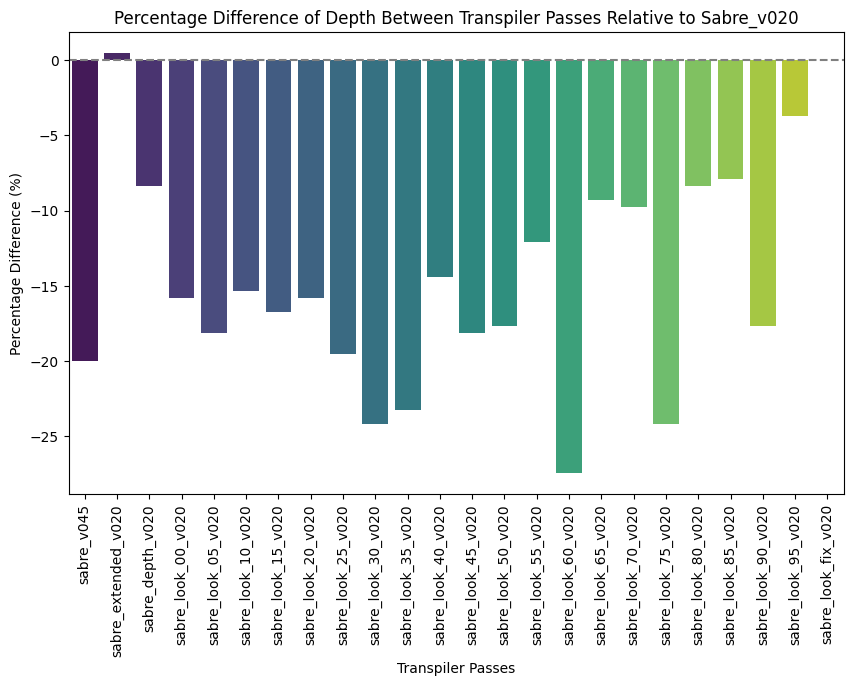

--- Depth_ratio Comparison ---
                Dataset  Average Depth_ratio  Percentage Difference (%)
0      sabre_depth_v020                 19.7                  -8.372093
1   sabre_extended_v020                 21.6                   0.465116
2    sabre_look_00_v020                 18.1                 -15.813953
3    sabre_look_05_v020                 17.6                 -18.139535
4    sabre_look_10_v020                 18.2                 -15.348837
5    sabre_look_15_v020                 17.9                 -16.744186
6    sabre_look_20_v020                 18.1                 -15.813953
7    sabre_look_25_v020                 17.3                 -19.534884
8    sabre_look_30_v020                 16.3                 -24.186047
9    sabre_look_35_v020                 16.5                 -23.255814
10   sabre_look_40_v020                 18.4                 -14.418605
11   sabre_look_45_v020                 17.6                 -18.139535
12   sabre_look_50_v020          

/var/folders/jt/44gl1rhd26v6ykt0frqzl87r0000gn/T/ipykernel_37940/1874323551.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reordered_comparison, x='Dataset', y='Percentage Difference (%)', palette='viridis')


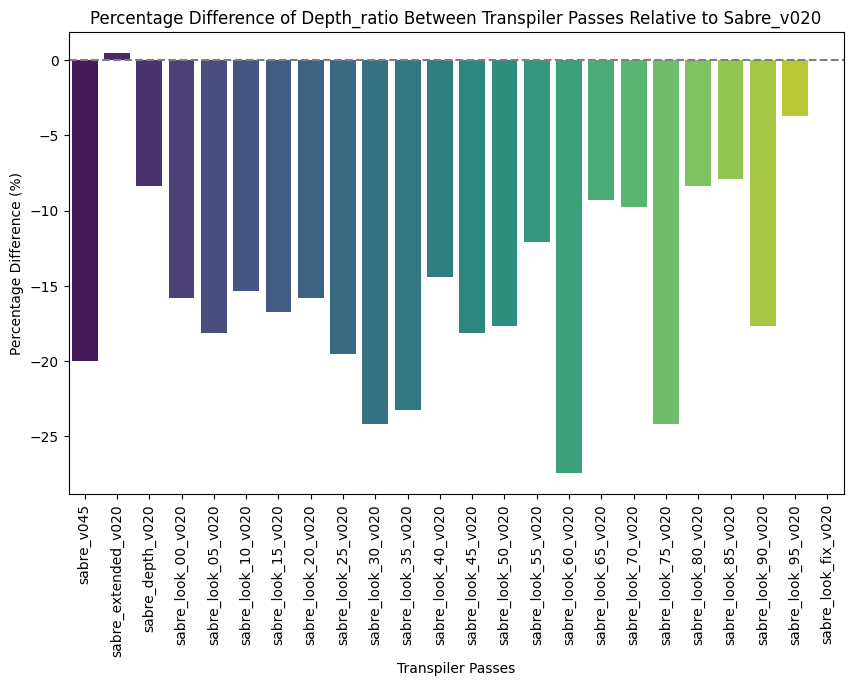

--- Time Comparison ---
                Dataset  Average Time  Percentage Difference (%)
0      sabre_depth_v020      3.913686                 728.340840
1   sabre_extended_v020      0.524174                  10.942653
2    sabre_look_00_v020      0.643844                  36.271021
3    sabre_look_05_v020      4.902368                 937.597663
4    sabre_look_10_v020      9.134685                1833.377538
5    sabre_look_15_v020     12.046554                2449.681409
6    sabre_look_20_v020     16.790987                3453.851778
7    sabre_look_25_v020     19.177352                3958.931571
8    sabre_look_30_v020     22.229289                4604.881175
9    sabre_look_35_v020     26.143298                5433.290340
10   sabre_look_40_v020     30.903454                6440.788567
11   sabre_look_45_v020     30.164017                6284.285069
12   sabre_look_50_v020     31.921819                6656.327992
13   sabre_look_55_v020     39.036046                8162.070753
1

/var/folders/jt/44gl1rhd26v6ykt0frqzl87r0000gn/T/ipykernel_37940/1874323551.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reordered_comparison, x='Dataset', y='Percentage Difference (%)', palette='viridis')


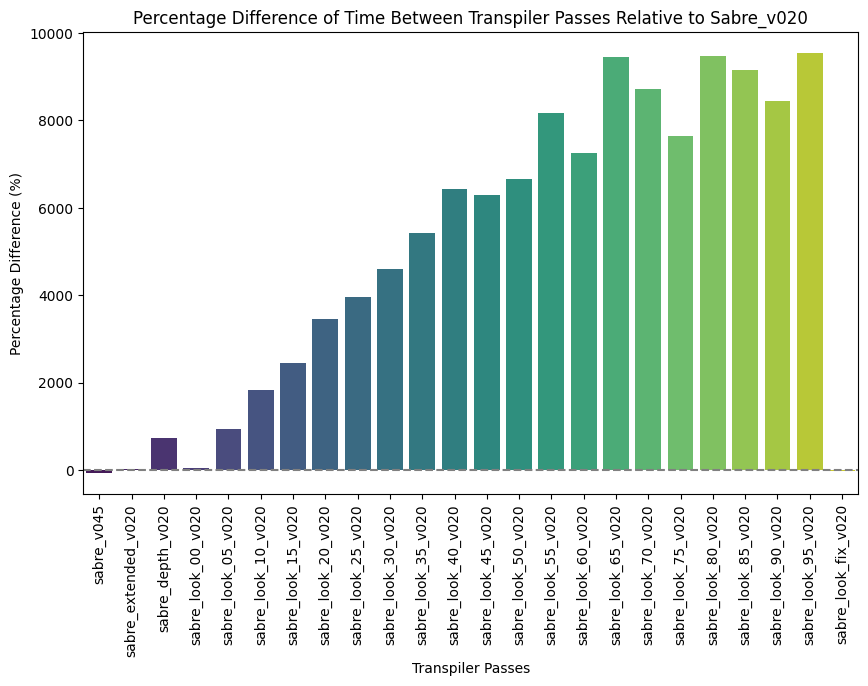

--- Cx_gates Comparison ---
                Dataset  Average Cx_gates  Percentage Difference (%)
0      sabre_depth_v020             795.0                   6.425703
1   sabre_extended_v020             717.0                  -4.016064
2    sabre_look_00_v020             795.0                   6.425703
3    sabre_look_05_v020             870.0                  16.465863
4    sabre_look_10_v020             768.0                   2.811245
5    sabre_look_15_v020             813.0                   8.835341
6    sabre_look_20_v020             789.0                   5.622490
7    sabre_look_25_v020             780.0                   4.417671
8    sabre_look_30_v020             741.0                  -0.803213
9    sabre_look_35_v020             768.0                   2.811245
10   sabre_look_40_v020             780.0                   4.417671
11   sabre_look_45_v020             747.0                   0.000000
12   sabre_look_50_v020             702.0                  -6.024096
13   s

/var/folders/jt/44gl1rhd26v6ykt0frqzl87r0000gn/T/ipykernel_37940/1874323551.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reordered_comparison, x='Dataset', y='Percentage Difference (%)', palette='viridis')


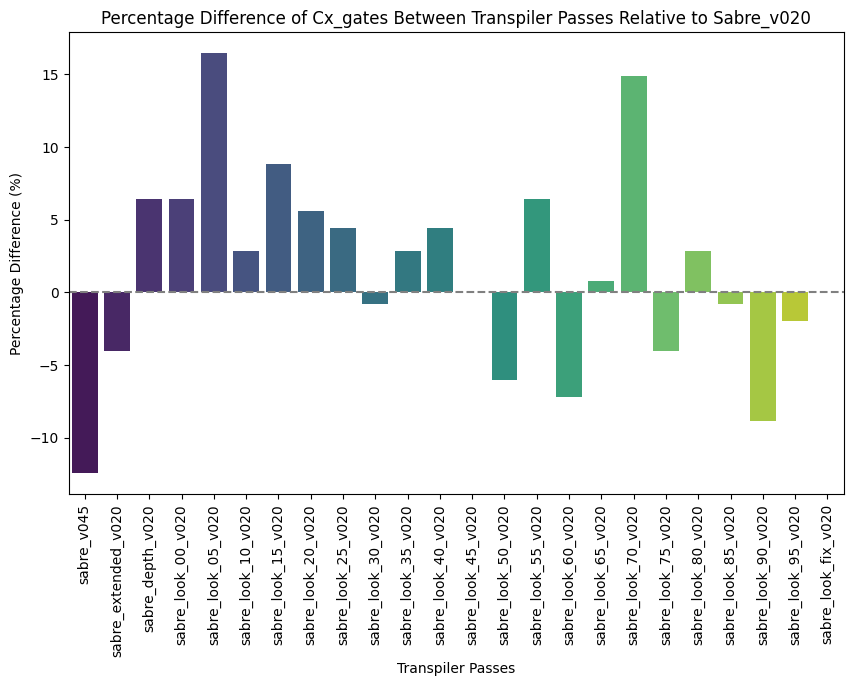

--- Num_gates Comparison ---
                Dataset  Average Num_gates  Percentage Difference (%)
0      sabre_depth_v020              915.0                   5.536332
1   sabre_extended_v020              837.0                  -3.460208
2    sabre_look_00_v020              915.0                   5.536332
3    sabre_look_05_v020              990.0                  14.186851
4    sabre_look_10_v020              888.0                   2.422145
5    sabre_look_15_v020              933.0                   7.612457
6    sabre_look_20_v020              909.0                   4.844291
7    sabre_look_25_v020              900.0                   3.806228
8    sabre_look_30_v020              861.0                  -0.692042
9    sabre_look_35_v020              888.0                   2.422145
10   sabre_look_40_v020              900.0                   3.806228
11   sabre_look_45_v020              867.0                   0.000000
12   sabre_look_50_v020              822.0                  -

/var/folders/jt/44gl1rhd26v6ykt0frqzl87r0000gn/T/ipykernel_37940/1874323551.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reordered_comparison, x='Dataset', y='Percentage Difference (%)', palette='viridis')


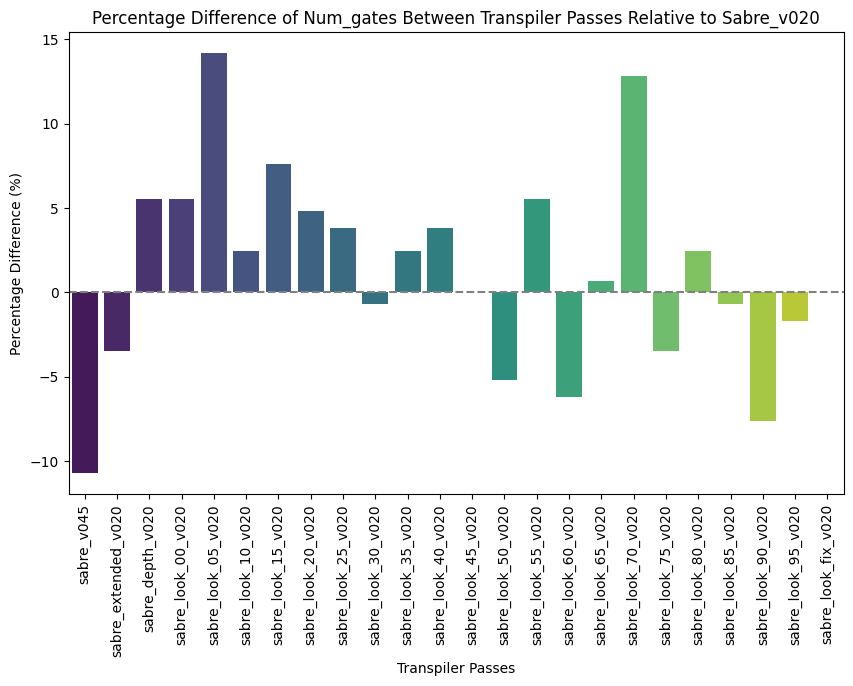

In [7]:
# Swapping the placement of the second and third bar in the adjusted bar graphs

for attribute in avg_results:
    avg_comparison = pd.DataFrame(avg_results[attribute], columns=['Dataset', f'Average {attribute.capitalize()}', 'Percentage Difference (%)'])
    print(f"--- {attribute.capitalize()} Comparison ---")
    print(avg_comparison)
    print("\n")

    # Reordering the dataset so that the last one is now first and then swapping the second and third bars
    reordered_comparison = avg_comparison.sort_values('Dataset')
    reordered_comparison = pd.concat([reordered_comparison.iloc[-1:], reordered_comparison.iloc[:-1]])
    reordered_comparison.iloc[[1, 2]] = reordered_comparison.iloc[[2, 1]].values

    # Plotting with the newly adjusted order
    plt.figure(figsize=(10, 6))
    sns.barplot(data=reordered_comparison, x='Dataset', y='Percentage Difference (%)', palette='viridis')
    plt.title(f'Percentage Difference of {attribute.capitalize()} Between Transpiler Passes Relative to Sabre_v020')
    plt.xlabel('Transpiler Passes')
    plt.xticks(rotation=90)  # Rotate x-axis labels to vertical
    plt.ylabel('Percentage Difference (%)')
    plt.axhline(0, color='gray', linestyle='--')  # Horizontal line at x = 0
    plt.show()
